In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [7]:
img_cv = cv2.imread('./Selected/N009.jpg')
cv2.namedWindow('Invoice',cv2.WINDOW_NORMAL)
cv2.imshow("Invoice",img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
type(img_cv)

numpy.ndarray

In [3]:
img_pl = PIL.Image.open('./Selected/N009.jpg')

In [4]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

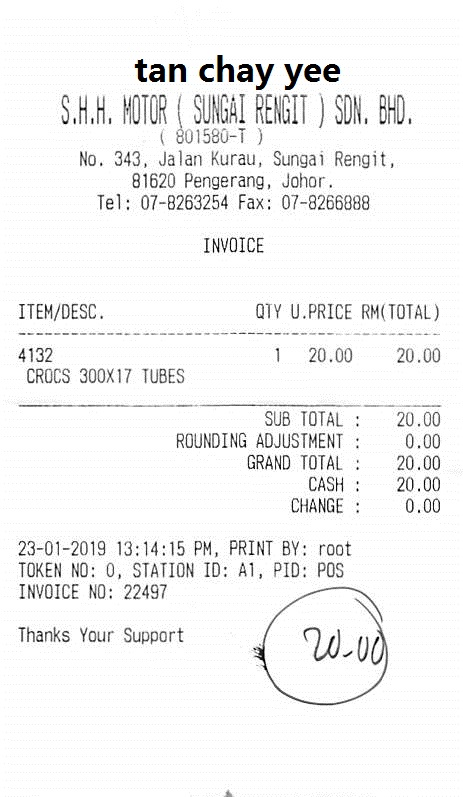

In [8]:
img_pl

### Text from Image

In [8]:
text_cv = pytesseract.image_to_string(img_cv)

In [9]:
print(text_cv)

HOME MASTER HARDWARE &

ELECTRICAL
NQ.113G & 1156, JALAN SETIA GEMBILANG

U13/GG BANDAR SETIA ALAM,
40770 BANDAR SETIA ALAM,
SELANGOR,

Company Reg Na. (S403711951-F
GST Reg No. 001837511166

TAK INVOICE
Invole No.; «CS 87832
Date: 22/12/2017 14:03
Cashler #: CASHIER
RM Code
24NIMW7Y M.ONE TAPE
1.00 ¥ 15.90 15.90 Sh
Subtotal: 75.90
TotalExclofGST 45.00
Tota! Incl. of GST 15.90
TotalAmtRounded 45.90
Payment : 50.00
Change Due : 34.10

- Total tema) +4
SG  ummary Amouni(RM) Tax (RM)
SR @a% 18.00 o.90

sissncees Thane yyy saeeenees
ARY GOODS RETURN PLEASE 00 WITHIN
¢ CAYS WITH ORIGINAL RECEIPT Ta”



In [8]:
text_pl = pytesseract.image_to_string(img_pl)

In [9]:
print(text_pl)

tan chay yee

MITER 8 (a (iu UNGAL RENGTT ) SON, Bt,
a0-T )
No. 343, Jalan Kurau, Sungai Rengit,
81620 Pengerang, Johor.
el; 07-8263254 Fax: 07-8266888

INVOICE

TTEM/DESC. QTY U.PRICE RNCTOTAL)
4132 1 20.00 20. 00
CROCS 300X17 TUBES

SUB TOTAL : 20.00

ROUNDING ADJUSTMENT : 0.00
GRAND TOTAL : 20.00

CASH : 20.00

CHANGE : 0.00

23-01-2019 13:14:15 PM, PRINT BY: root
TOKEN NO: 0, STATION ID: Al, PID: POS
INVOICE NO: 22497

Thanks Your Support Gy WwW 0)



### Image to Data

In [10]:
data = pytesseract.image_to_data(img_cv)

In [11]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [12]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,747,1412,-1,
1,2,1,1,0,0,0,151,50,410,33,-1,
2,3,1,1,1,0,0,151,50,410,33,-1,
3,4,1,1,1,1,0,151,50,410,33,-1,
4,5,1,1,1,1,1,151,50,84,26,95,HOME
5,5,1,1,1,1,2,243,51,115,29,96,MASTER
6,5,1,1,1,1,3,368,57,166,26,93,HARDWARE
7,5,1,1,1,1,4,543,58,18,25,92,&
8,2,1,2,0,0,0,88,91,535,64,-1,
9,3,1,2,1,0,0,88,91,535,64,-1,


In [13]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(int)

In [14]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [19]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue


cv2.namedWindow('bounding box',cv2.WINDOW_NORMAL)
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()